<h1>Midterms Review</h1>
<hr>

<h2># Adding Imports</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

<h2># Fetching the Dataset</h2>

In [2]:
chicago = pd.read_csv('DATASET/Chicago_Crimes.csv')

In [3]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h1># Looking for Null Values</h1>
<hr>

In [4]:
chicago.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [5]:
chicago['Location Description'] = chicago['Location Description'].fillna('Unknown')
chicago['X Coordinate'] = chicago['X Coordinate'].fillna('Unknown')
chicago['Y Coordinate'] = chicago['Y Coordinate'].fillna('Unknown')
chicago['Latitude'] = chicago['Latitude'].fillna('Unknown')
chicago['Longitude'] = chicago['Longitude'].fillna('Unknown')
chicago['Location'] = chicago['Location'].fillna('Unknown')

In [6]:
chicago.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          3
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1># Changing Datatypes</h1>
<hr>

In [7]:
chicago['Primary Type'] = chicago['Primary Type'].astype('category')
chicago['Location Description'] = chicago['Location Description'].astype('category')
chicago['Year'] = chicago['Year'].astype('category')

In [8]:
chicago['Date'] = pd.to_datetime(chicago['Date'], dayfirst = True, errors = 'coerce')

In [9]:
chicago.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                  category
Description                     object
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                        object
X Coordinate                    object
Y Coordinate                    object
Year                          category
Updated On                      object
Latitude                        object
Longitude                       object
Location                        object
dtype: object

<h1># Adding DateTime Columns</h1>

In [10]:
chicago['Date'].value_counts()

Date
2024-01-11 00:00:00    70
2024-01-05 00:00:00    69
2024-01-06 00:00:00    69
2024-01-08 00:00:00    69
2024-01-09 00:00:00    65
                       ..
2025-11-04 21:40:00     1
2025-11-04 21:43:00     1
2025-11-04 21:45:00     1
2024-06-21 19:33:00     1
2024-04-14 00:14:00     1
Name: count, Length: 126287, dtype: int64

In [11]:
chicago['Month'] = chicago['Date'].dt.month
chicago['Day'] = chicago['Date'].dt.day
chicago['DayofWeek'] = chicago['Date'].dt.dayofweek

<h1>Q1: What's the Highest recorded crime in Chicago</h1>
<hr>

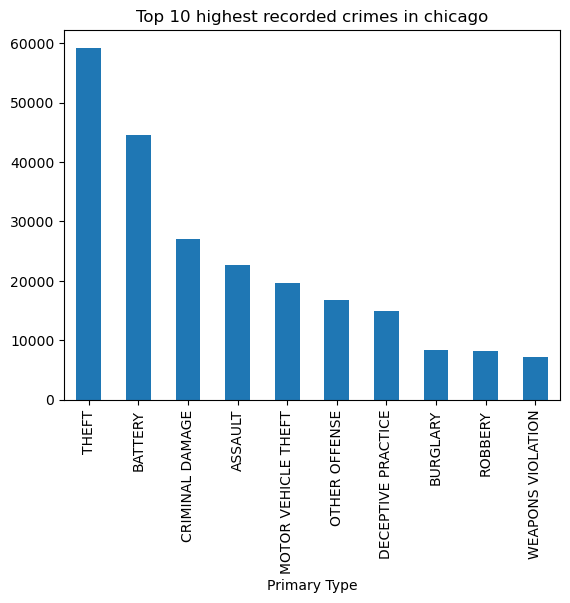

In [12]:
chicago['Primary Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 highest recorded crimes in chicago')
plt.show()

In [13]:
chicago['Primary Type'].value_counts().head(10)

Primary Type
THEFT                  59201
BATTERY                44579
CRIMINAL DAMAGE        27094
ASSAULT                22615
MOTOR VEHICLE THEFT    19604
OTHER OFFENSE          16781
DECEPTIVE PRACTICE     14991
BURGLARY                8443
ROBBERY                 8200
WEAPONS VIOLATION       7164
Name: count, dtype: int64

<h3>Insight 1: The highest recorded crime in chicago is Theft</h3>

<h1>Q2: What are the top 10 highest recorded crimes in chicago's residence area</h1>
<hr>

<function matplotlib.pyplot.show(close=None, block=None)>

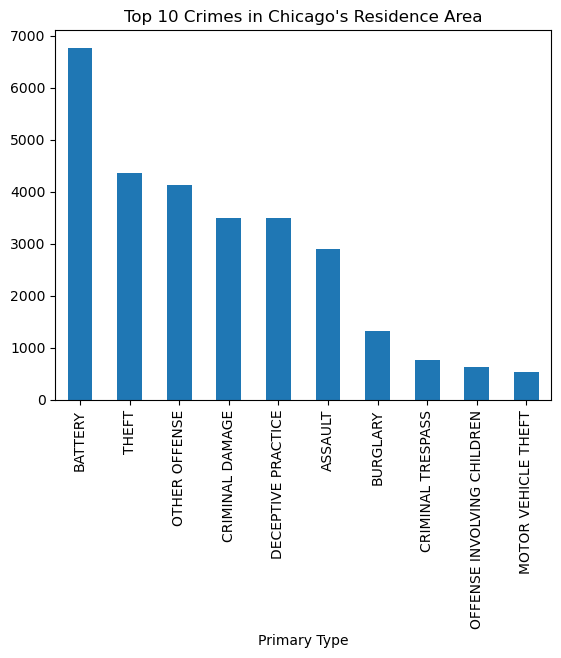

In [14]:
residence_chicago = chicago[chicago['Location Description'] == 'RESIDENCE']
residence_chicago['Primary Type'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Crimes in Chicago's Residence Area")
plt.show

In [15]:
residence_chicago['Primary Type'].value_counts().head(10)

Primary Type
BATTERY                       6769
THEFT                         4350
OTHER OFFENSE                 4134
CRIMINAL DAMAGE               3500
DECEPTIVE PRACTICE            3494
ASSAULT                       2889
BURGLARY                      1328
CRIMINAL TRESPASS              758
OFFENSE INVOLVING CHILDREN     629
MOTOR VEHICLE THEFT            523
Name: count, dtype: int64

<h3>Insight 2: The crime of battery is the highest recorded crime at chicago's residence area for its easy requirement to be prosecuted of said crime</h3>

<h1>Q3: How many Arrest are made during 2025</h1>
<hr>

In [16]:
arrest_25 = chicago[chicago['Arrest'] == True]
arrest_25['Year'].value_counts()

Year
2024    25417
2025    10585
Name: count, dtype: int64

<h3>Insight 3: The year 2025 has an arrest record of 10,585</h3>

<h1>Q4: How many crimes of Battery were commited During 2024 and 2025</h1>
<hr>

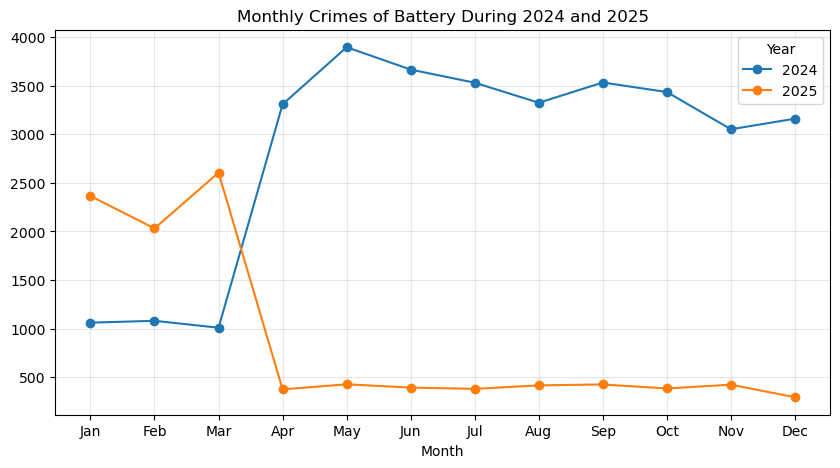

In [19]:
batteries = chicago[chicago['Primary Type'] == 'BATTERY']
battery_monthly = batteries.groupby(['Year', 'Month'])['Case Number'].count()
battery_monthly = battery_monthly.unstack(level=0)
battery_monthly.plot(
                  marker='o', 
                  figsize=(10, 5),
                  title='Monthly Crimes of Battery During 2024 and 2025'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

In [20]:
batteries['Year'].value_counts()

Year
2024    34052
2025    10527
Name: count, dtype: int64

<h3>Insight 4: The year 2025 has a record of 10,577 crimes of battery while the year 2024 has more than double the ammount</h3>

<h1>Q5: What's the top 15 locations with the highes crime rate in Chicago</h1>

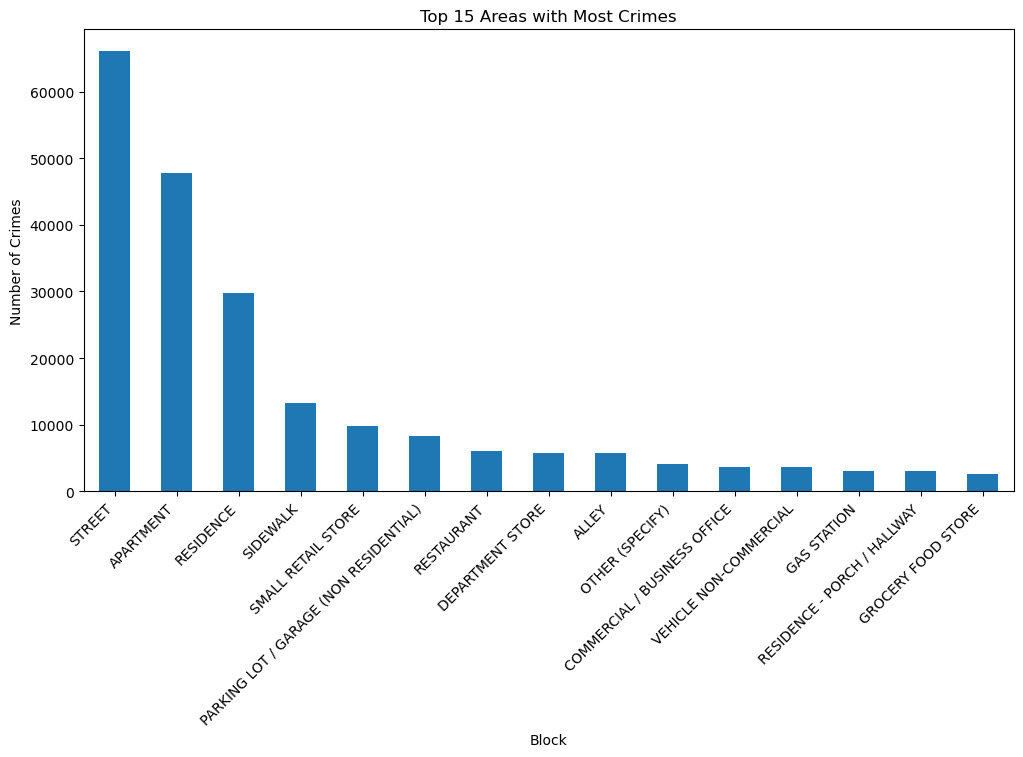

In [21]:
top_areas = chicago['Location Description'].value_counts().head(15)
plt.figure(figsize=(12,6))
top_areas.plot(kind="bar")
plt.title("Top 15 Areas with Most Crimes")
plt.xlabel("Block")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [22]:
top_areas

Location Description
STREET                                    66040
APARTMENT                                 47787
RESIDENCE                                 29776
SIDEWALK                                  13265
SMALL RETAIL STORE                         9858
PARKING LOT / GARAGE (NON RESIDENTIAL)     8350
RESTAURANT                                 6094
DEPARTMENT STORE                           5768
ALLEY                                      5695
OTHER (SPECIFY)                            4072
COMMERCIAL / BUSINESS OFFICE               3712
VEHICLE NON-COMMERCIAL                     3667
GAS STATION                                2993
RESIDENCE - PORCH / HALLWAY                2988
GROCERY FOOD STORE                         2615
Name: count, dtype: int64

<h3>Insight 5: Streets have the most recorded crimes among the 15 havign around 30% more than the second highest</h3>
<h3>Insight 6: Grocery Food Stores have the least among the 15</h3>

<h1>Q6: What's the top 10 locations with the highest domestic crime rate</h1>

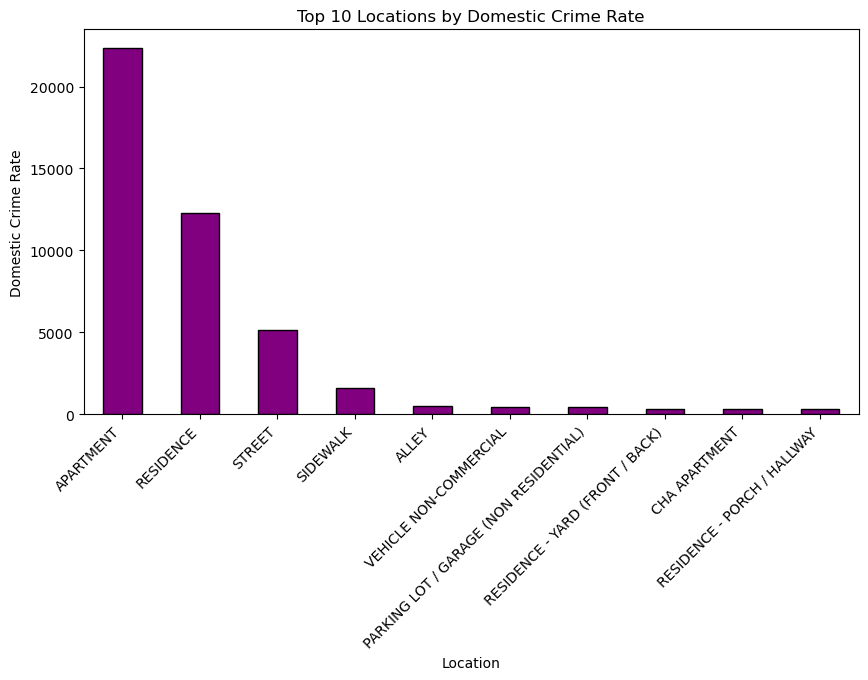

In [23]:
domestic = chicago[chicago['Domestic'] == True]
domestic_by_location = domestic["Location Description"].value_counts().head(10)

plt.figure(figsize=(10,5))
domestic_by_location.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Top 10 Locations by Domestic Crime Rate")
plt.xlabel("Location")
plt.ylabel("Domestic Crime Rate")
plt.xticks(rotation=45, ha="right")
plt.show()


In [24]:
domestic_by_location

Location Description
APARTMENT                                 22370
RESIDENCE                                 12275
STREET                                     5162
SIDEWALK                                   1612
ALLEY                                       483
VEHICLE NON-COMMERCIAL                      470
PARKING LOT / GARAGE (NON RESIDENTIAL)      464
RESIDENCE - YARD (FRONT / BACK)             341
CHA APARTMENT                               323
RESIDENCE - PORCH / HALLWAY                 320
Name: count, dtype: int64

<h3>Insight 7: Apartments have the highest recoded domestic crimes among the 10</h3>
<h3>Insight 8: Porches and Halways of Residencial areas have the least among the 10 only having a crime record of 320</h3>

<h1>Q7: Which location is most associated with theft crimes?</h1>

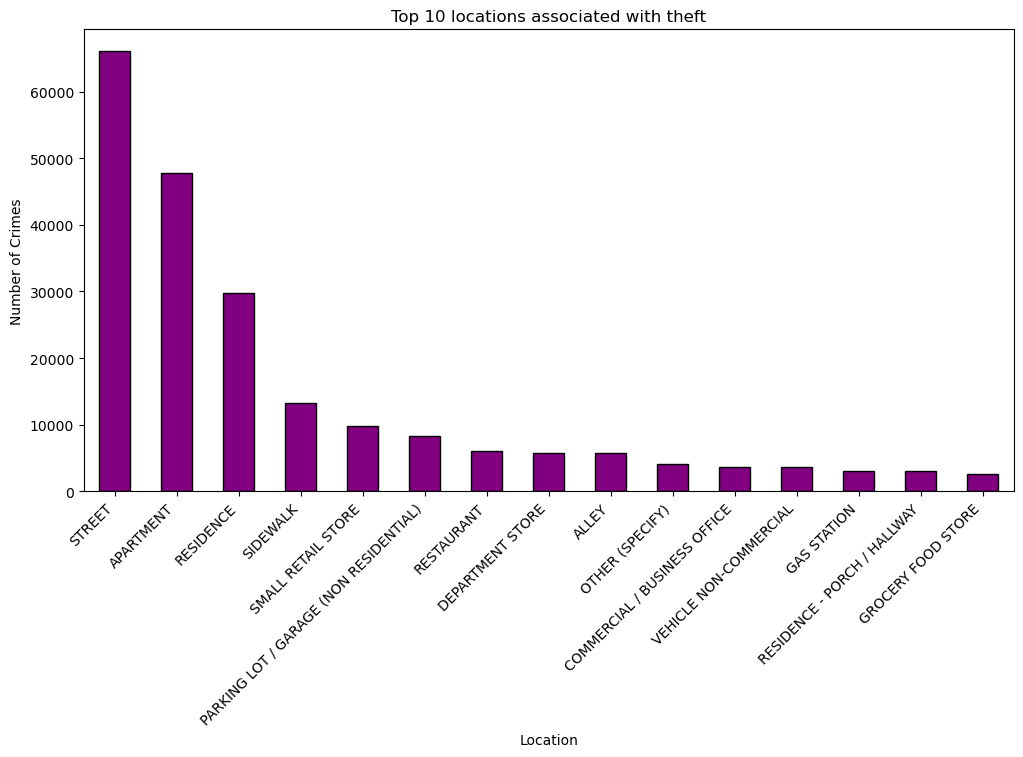

In [25]:
theft = chicago[chicago['Primary Type'] == 'THEFT']
theft_loc = theft['Location Description'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_areas.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Top 10 locations associated with theft")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [32]:
theft_loc

Location Description
STREET                                    13185
APARTMENT                                  7513
SMALL RETAIL STORE                         6680
DEPARTMENT STORE                           4726
RESIDENCE                                  4350
PARKING LOT / GARAGE (NON RESIDENTIAL)     2319
RESTAURANT                                 1950
RESIDENCE - PORCH / HALLWAY                1839
SIDEWALK                                   1641
DRUG STORE                                 1384
Name: count, dtype: int64

<h3>Insight 9: Streets have the highest recorded theft crimes among the 10</h3>
<h3>Insight 10: Gorcery stores on the other hand have the least among the 10 only having a crime record of 1384</h3>

<h1>Q8: Which crime is most often domestic?</h1>

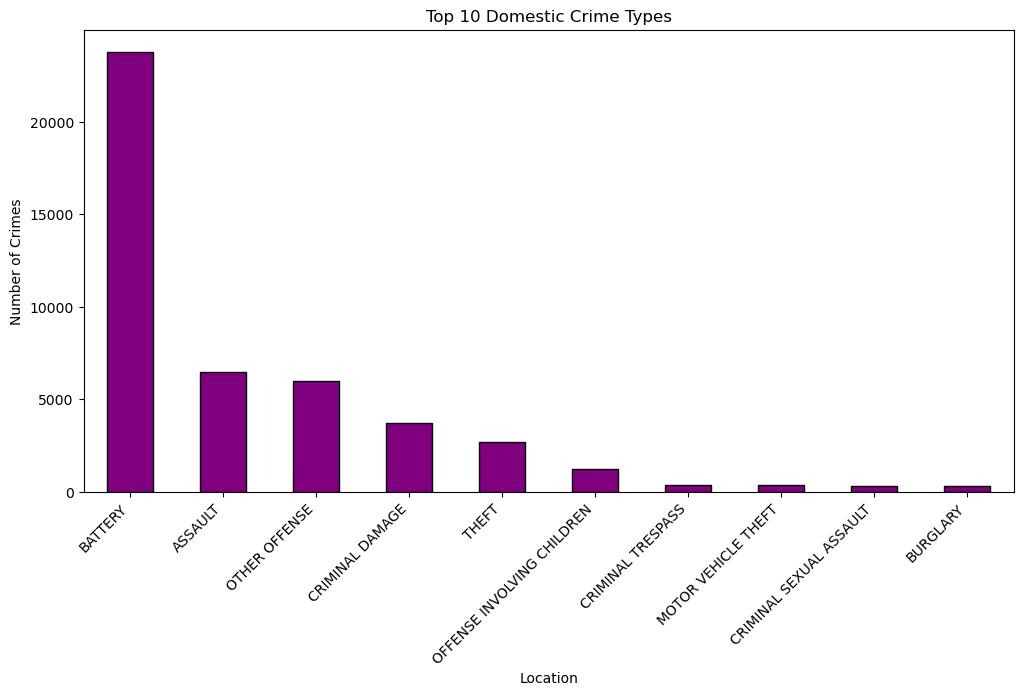

In [31]:
domestic = chicago[chicago['Domestic'] == True]
domestic_crime = domestic['Primary Type'].value_counts().head(10)
plt.figure(figsize=(12,6))
domestic_crime.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Top 10 Domestic Crime Types")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [27]:
domestic['Primary Type'].value_counts().head(10)

Primary Type
BATTERY                       23764
ASSAULT                        6453
OTHER OFFENSE                  5970
CRIMINAL DAMAGE                3736
THEFT                          2674
OFFENSE INVOLVING CHILDREN     1219
CRIMINAL TRESPASS               375
MOTOR VEHICLE THEFT             351
CRIMINAL SEXUAL ASSAULT         309
BURGLARY                        305
Name: count, dtype: int64

<h3>Insight 11: The crime of battery has the highest recorded crime thats most often domestic</h3>

<h1>Q9: Which crime type has the highest arrest rate during 2024</h1>

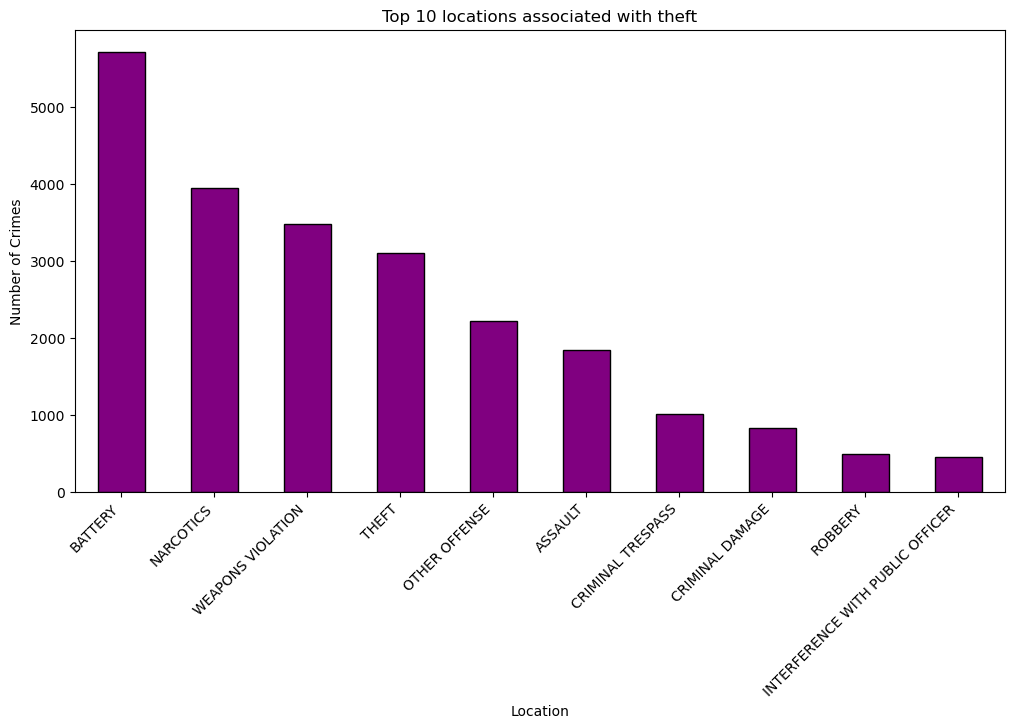

In [28]:
arrest_24 = chicago[(chicago['Arrest'] == True) & (chicago['Year'] == 2024)]
arrest_crime24 = arrest_24['Primary Type'].value_counts().head(10)
plt.figure(figsize=(12,6))
arrest_crime24.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Top 10 locations associated with theft")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [29]:
arrest_24['Primary Type'].value_counts().head(10)

Primary Type
BATTERY                             5713
NARCOTICS                           3948
WEAPONS VIOLATION                   3483
THEFT                               3097
OTHER OFFENSE                       2223
ASSAULT                             1842
CRIMINAL TRESPASS                   1009
CRIMINAL DAMAGE                      827
ROBBERY                              493
INTERFERENCE WITH PUBLIC OFFICER     446
Name: count, dtype: int64

<h3>Insight 12: The crime of battery has the highest recorded crime with the highest arrest rate</h3>

<h1>Q10: What is the average number of crimes per district?</h1>

In [33]:
chicago['District'].value_counts().mean().round(2)

np.float64(10831.43)

<h3>Insight 13: This shows the distribution of crimes accross districts</h3>

<h1>Q11: Whats the top 10 occuring crimes in chicago's streets</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

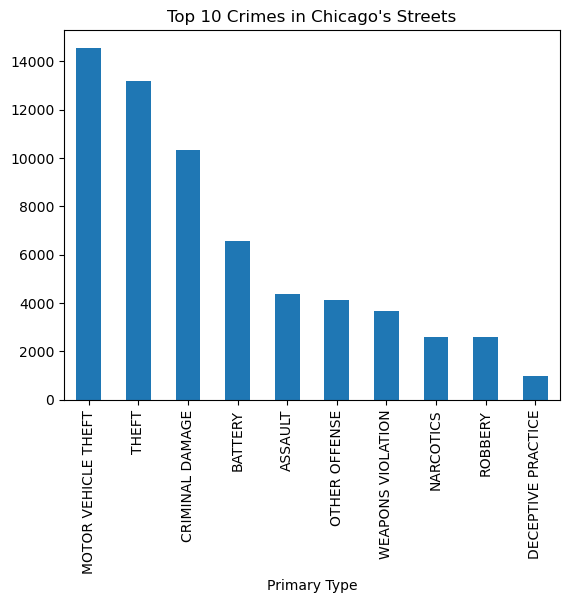

In [34]:
street_chicago = chicago[chicago['Location Description'] == 'STREET']
street_chicago['Primary Type'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Crimes in Chicago's Streets")
plt.show

In [35]:
street_chicago['Primary Type'].value_counts().head(10)

Primary Type
MOTOR VEHICLE THEFT    14550
THEFT                  13185
CRIMINAL DAMAGE        10334
BATTERY                 6578
ASSAULT                 4361
OTHER OFFENSE           4114
WEAPONS VIOLATION       3686
NARCOTICS               2607
ROBBERY                 2590
DECEPTIVE PRACTICE      1003
Name: count, dtype: int64

<h3>Insight 14: Vehicle theft is the highest recorded crime among the 10</h3>
<h3>Insight 15: Theft on the other hand is the second highest recorded crime among the 10 only having over 1000 less</h3>

<h1>Q12: What's the Top 10 Locatin that has the highest Arrest record of crimes in 2025</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

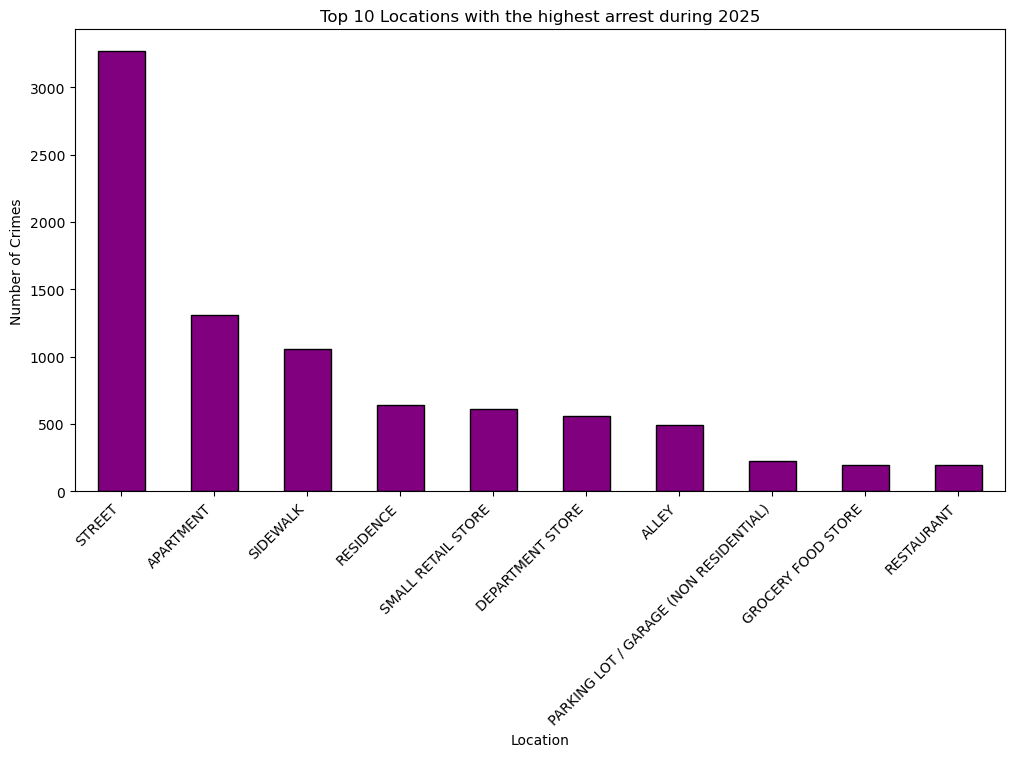

In [38]:
arrest_25 = chicago[(chicago['Arrest'] == True) & (chicago['Year'] == 2025)]
arrest25_loc = arrest_25['Location Description'].value_counts().head(10)
plt.figure(figsize=(12,6))
arrest25_loc.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Top 10 Locations with the highest arrest during 2025")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show

In [39]:
arrest25_loc

Location Description
STREET                                    3266
APARTMENT                                 1311
SIDEWALK                                  1058
RESIDENCE                                  644
SMALL RETAIL STORE                         610
DEPARTMENT STORE                           561
ALLEY                                      496
PARKING LOT / GARAGE (NON RESIDENTIAL)     229
GROCERY FOOD STORE                         197
RESTAURANT                                 192
Name: count, dtype: int64

<h3>Insight 16: Streets have the highest arrest record among the 10</h3>
<h3>Insight 17: Grocery Food Stores has 5 more recorded arrest compared to Restaurants with 192 recorded arrests</h3>

<h1>Q13: Which Locations have the Highest Recorded Arrest of Assault</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

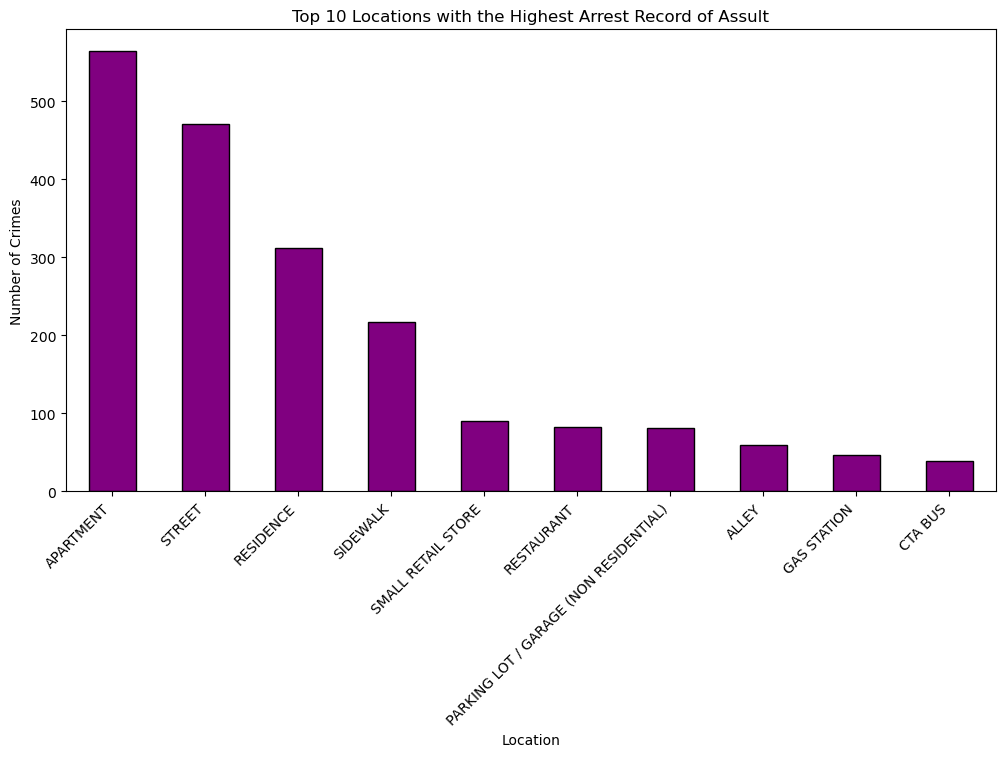

In [40]:
arrest_ass = chicago[(chicago['Arrest'] == True) & (chicago['Primary Type'] == 'ASSAULT')]
arass_loc = arrest_ass['Location Description'].value_counts().head(10)
plt.figure(figsize=(12,6))
arass_loc.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Top 10 Locations with the Highest Arrest Record of Assult")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show

In [42]:
arass_loc

Location Description
APARTMENT                                 564
STREET                                    471
RESIDENCE                                 312
SIDEWALK                                  217
SMALL RETAIL STORE                         90
RESTAURANT                                 82
PARKING LOT / GARAGE (NON RESIDENTIAL)     81
ALLEY                                      59
GAS STATION                                46
CTA BUS                                    39
Name: count, dtype: int64

<h3>Insight 18: Apartments have the highest arrest record of assault among the 10</h3>
<h3>Insight 19: CTA Bus on the otherhand only has an arrest record of 39 on assault</h3>

<h1>Q14: Which Month of the Year 2024 and 2025 has the highest Arrest record on Assault</h1>

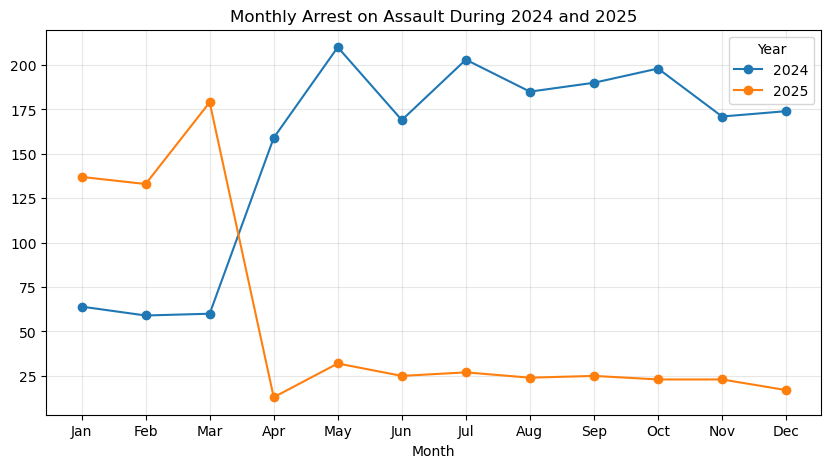

In [49]:
arrest_ass = chicago[(chicago['Arrest'] == True) & (chicago['Primary Type'] == 'ASSAULT')]
arass_monthly = arrest_ass.groupby(['Year', 'Month'])['Case Number'].count()
arass_monthly = arass_monthly.unstack(level=0)
arass_monthly.plot(
                  marker='o', 
                  figsize=(10, 5),
                  title='Monthly Arrest on Assault During 2024 and 2025'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h3>Insight 20: Both the Year 2024 and 2025 have an increas in arrest during the month of april and decreasing during may</h3>
<h3>Insight 21: 2025 is the year where the rate of arrest for assault decreses starting at march decreasing to two digits and becoming consistent throughout the year</h3>

<h1>Q15: What's the Daily Crime Record During the Month of March</h1>

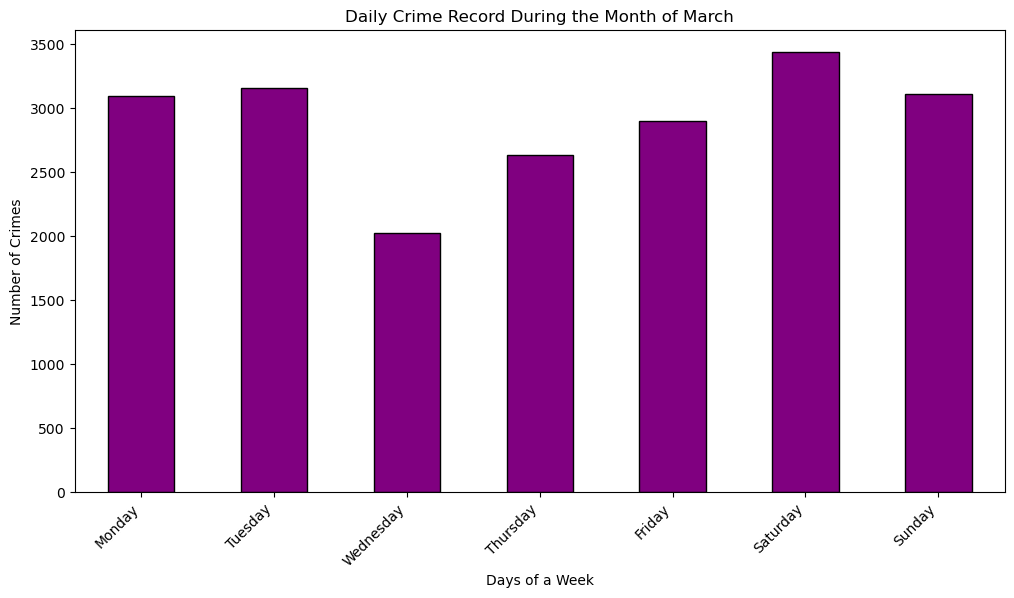

In [69]:
daily_map = {6: 'Sunday', 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
           3: 'Thursday', 4: 'Friday', 5: 'Saturday'}


march = chicago[chicago['Month'] == 3]
daily_march = march['DayofWeek'].map(daily_map).value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)



plt.figure(figsize=(12,6))
daily_march.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Daily Crime Record During the Month of March")
plt.xlabel("Days of a Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [70]:
daily_march

DayofWeek
Monday       3093
Tuesday      3153
Wednesday    2023
Thursday     2630
Friday       2898
Saturday     3437
Sunday       3108
Name: count, dtype: int64

<h3>Insight 22: The Day with the highest recorded crime during march is Saturday</h3>
<h3>Insight 23: Wednesday, Thursday, and Friday are the only days of the week with a crime record os less than 3000</h3>

<h1>Q16: What's the Highest Recorded Domestic Crimes at Small Retail Stores</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

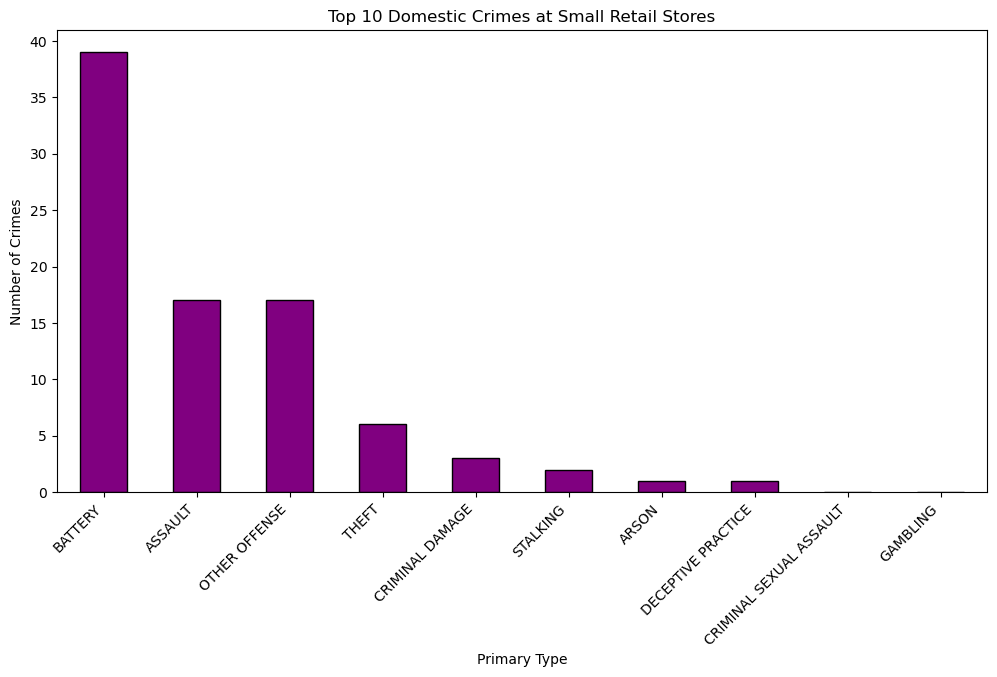

In [74]:
domestic_retails = chicago[(chicago['Location Description'] == 'SMALL RETAIL STORE') & (chicago['Domestic'] == True)]
retail_domestic = domestic_retails['Primary Type'].value_counts().head(10)
plt.figure(figsize=(12,6))
retail_domestic.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Top 10 Domestic Crimes at Small Retail Stores")
plt.xlabel("Primary Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show

In [75]:
retail_domestic

Primary Type
BATTERY                    39
ASSAULT                    17
OTHER OFFENSE              17
THEFT                       6
CRIMINAL DAMAGE             3
STALKING                    2
ARSON                       1
DECEPTIVE PRACTICE          1
CRIMINAL SEXUAL ASSAULT     0
GAMBLING                    0
Name: count, dtype: int64

<h3>Insight 24: The higest record for domestic crimes is Battery with only 39 crime records</h3>
<h3>Insight 25: The second highest recorded domestic crime is Assault with less than half of Battery</h3>

<h1>Q17: Whats the Daily Crime Record on Gas Stations During 2024</h1>

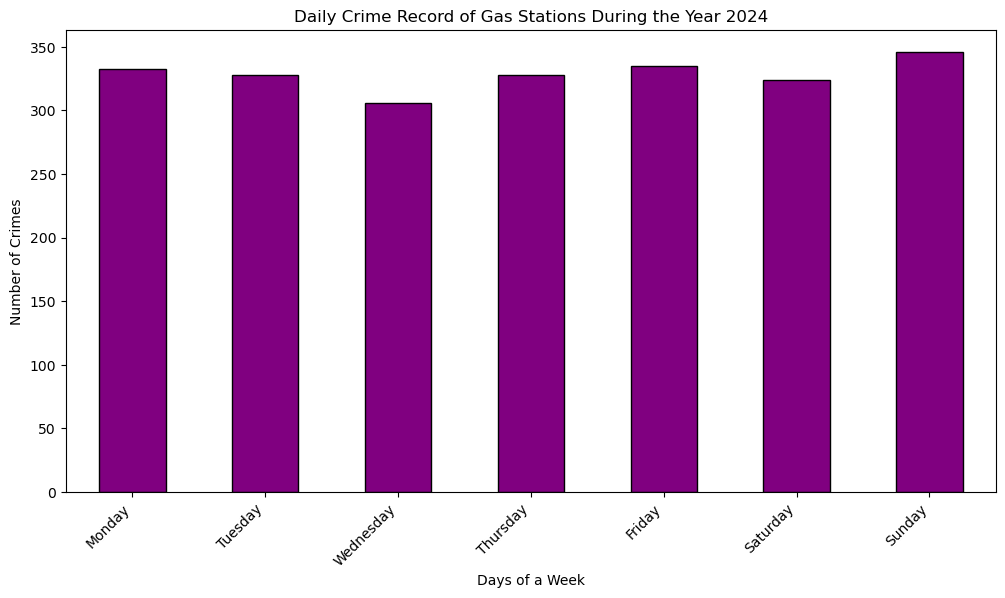

In [77]:
gas_24 = chicago[(chicago['Location Description'] == 'GAS STATION') & (chicago['Year'] == 2024)]

daily_map = {6: 'Sunday', 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
           3: 'Thursday', 4: 'Friday', 5: 'Saturday'}

daily_gas = gas_24['DayofWeek'].map(daily_map).value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(12,6))
daily_gas.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Daily Crime Record of Gas Stations During the Year 2024")
plt.xlabel("Days of a Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [78]:
daily_gas

DayofWeek
Monday       333
Tuesday      328
Wednesday    306
Thursday     328
Friday       335
Saturday     324
Sunday       346
Name: count, dtype: int64

<h3>Insight 26: Sunday has the highest record of crime during 2024</h3>
<h3>Insight 27: From Monday to Sunday, all days of the week have a crime record of 300 and above</h3>

<h1>Q18: Which Month has the highest recorded Retail Theft during 2025</h1>

In [81]:
chicago['Description'].value_counts().head(20)

Description
SIMPLE                                 30526
DOMESTIC BATTERY SIMPLE                19810
$500 AND UNDER                         17963
OVER $500                              16572
TO VEHICLE                             14886
AUTOMOBILE                             14780
RETAIL THEFT                           14053
TO PROPERTY                            11652
AGGRAVATED - HANDGUN                    5935
FROM BUILDING                           4941
UNLAWFUL POSSESSION - HANDGUN           4693
FORCIBLE ENTRY                          4120
THEFT FROM MOTOR VEHICLE                3701
TELEPHONE THREAT                        3343
ARMED - HANDGUN                         3203
TO LAND                                 3073
AGGRAVATED - OTHER DANGEROUS WEAPON     2987
FINANCIAL IDENTITY THEFT OVER $ 300     2910
ATTEMPT - AUTOMOBILE                    2628
FRAUD OR CONFIDENCE GAME                2570
Name: count, dtype: int64

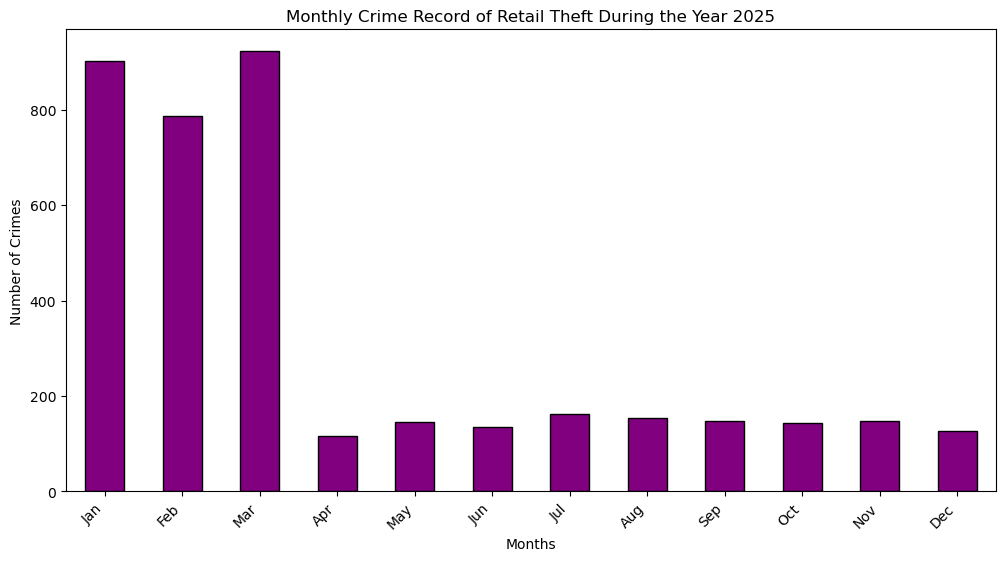

In [85]:
retail_25 = chicago[(chicago['Description'] == 'RETAIL THEFT') & (chicago['Year'] == 2025)]

monthly_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 
           4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_retail = retail_25['Month'].map(monthly_map).value_counts().reindex(
     ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)

plt.figure(figsize=(12,6))
monthly_retail.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Monthly Crime Record of Retail Theft During the Year 2025")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [87]:
monthly_retail

Month
Jan    902
Feb    787
Mar    922
Apr    116
May    145
Jun    136
Jul    162
Aug    154
Sep    148
Oct    144
Nov    147
Dec    126
Name: count, dtype: int64

<h3>Insight 28: January, Febuary, and March are the only months in 2025 with a crime record of 780 and above in retail theft</h3>